# GaussianNB fit with TFIDF Vectorizer

In [1]:
#Importing Data from the CSV file
%matplotlib inline
import string
import math
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectPercentile, chi2


f_train = open("training.1600000.processed.noemoticon.csv", "r", encoding="ISO-8859-1")
X_train = f_train.readlines()
f_test = open("testdata.manual.2009.06.14.csv", "r")
X_test = f_test.readlines()

#Creating the List with just the tweets and finding the number of positive and negative classes. (TRAINING) 
#class_0 = number of classes with label = 0
#class_4 = number of classes with label = 4

class_0=class_4=0
tweets_train =[]
for x in X_train:
    a = x.split('","')
    if (a[0] == '"0'): class_0+=1
    else: class_4+=1
    tweets_train.append('%s"|"%s' % (a[0],a[-1]))

#Creating the List with just the tweets (TEST DATA)
tweets_test =[]
for x in X_test:
    a = x.split('","')
    tweets_test.append('%s"|"%s' % (a[0], a[-1]))
    
print("The length of the training set is = ", len(X_train))
print("The number of classes (label=4) =", class_4)
print("The number of classes (label=0) =", class_0)
print("The length of the test set is = ", len(X_test))

f_test.close()
f_train.close()

m= len(X_train)
phi_0 = class_0/m
phi_4 = class_4/m

The length of the training set is =  1600000
The number of classes (label=4) = 800000
The number of classes (label=0) = 800000
The length of the test set is =  359


In [2]:
tweets_train_pd = pd.Series(tweets_train)
tweets_test_pd = pd.Series(tweets_test)
train_actual_classes = tweets_train_pd.apply(lambda x: (x.split("|")[0]))
test_actual_classes = tweets_test_pd.apply(lambda x: (x.split("|")[0]))
tweets_train_pd = tweets_train_pd.apply(lambda x: x.split("|")[1])
tweets_test_pd = tweets_test_pd.apply(lambda x: x.split("|")[1])


In [3]:
train_classes = train_actual_classes.apply(lambda x: 0 if x=='"0"' else 1)
test_classes = test_actual_classes.apply(lambda x: 0 if x=='"0"' else 1)
all_classes = train_classes.unique()

## TFIDF - Using Gaussian Naive Bayes - And using min_df to clip unimp features

Now try min_df=0.001 with TFIDF_vectorizer - Accuracy = 77.71% (features=937)

with TFIDF transformer + count Vect
min_df=0.001 with TFIDF_vectorizer - Accuracy = 77.71% (features=937)
Gives memory error at min-df=0.0001, features=5972 - try with batches size=1000 - Accuracy = 74.65%
Gives memory error at min-df=0.00001, features=29485 - try with batches size=1000 - Accuracy = 64.06 (5 epochs)


In [4]:
test_accuracy = []


In [5]:
print("\n------------Training a Gaussian NB using TFIDF Vectorizer--------------------------\n")

print("--------------------Train Model with TFIDF with Unigrams-------------------------------\n")

model_gauss = GaussianNB([phi_0, phi_4])
tfidf_vec = TfidfVectorizer(analyzer="word", stop_words='english',sublinear_tf=True, min_df=0.001)
tfidf_train = tfidf_vec.fit_transform(tweets_train_pd)
model_gauss.fit(tfidf_train.toarray(), train_classes)
X_test = tfidf_vec.transform(tweets_test_pd)
test_accuracy.append(model_gauss.score(X_test.toarray(), test_classes))
print("The number of features in this model with min_df = {} is = {}".format(0.001, model_gauss.theta_.shape[1]))

print("The Test Accuracy of the Gaussian NB model trained with TF-IDF unigrams is = {:2.3f}%".format(test_accuracy[0]*100))



------------Training a Gaussian NB using TFIDF Vectorizer--------------------------

--------------------Train Model with TFIDF with Unigrams-------------------------------

The number of features in this model with min_df = 0.001 is = 937
The Test Accuracy of the Gaussian NB model trained with TF-IDF unigrams is = 77.716%


In [6]:
print("--------------------Train Model with TFIDF with Unigrams+bigrams-------------------------------\n")

model_gauss = GaussianNB([phi_0, phi_4])
tfidf_vec = TfidfVectorizer(analyzer="word", stop_words='english',sublinear_tf=True, min_df=0.001, ngram_range=(1,2))
tfidf_train = tfidf_vec.fit_transform(tweets_train_pd)
model_gauss.fit(tfidf_train.toarray(), train_classes)
X_test = tfidf_vec.transform(tweets_test_pd)
test_accuracy.append(model_gauss.score(X_test.toarray(), test_classes))
print("The number of features in this model with min_df = {} is = {}".format(0.001, model_gauss.theta_.shape[1]))

print("The Test Accuracy of the Gaussian NB model trained with TF-IDF uni+bigrams is = {:2.3f}%".format(test_accuracy[1]*100))


--------------------Train Model with TFIDF with Unigrams+bigrams-------------------------------

The number of features in this model with min_df = 0.001 is = 1003
The Test Accuracy of the Gaussian NB model trained with TF-IDF uni+bigrams is = 76.880%


In [7]:
print("--------------------Train Model with TFIDF with Unigrams+Trigrams-------------------------------\n")

model_gauss = GaussianNB([phi_0, phi_4])
tfidf_vec = TfidfVectorizer(analyzer="word", stop_words='english',sublinear_tf=True, min_df=0.001, ngram_range=(1,3))
tfidf_train = tfidf_vec.fit_transform(tweets_train_pd)


--------------------Train Model with TFIDF with Unigrams+Trigrams-------------------------------



In [ ]:
model_gauss.fit(tfidf_train.toarray(), train_classes)
X_test = tfidf_vec.transform(tweets_test_pd)
test_accuracy.append(model_gauss.score(X_test.toarray(), test_classes))
print("The number of features in this model with min_df = {} is = {}".format(0.001, model_gauss.theta_.shape[1]))

print("The Test Accuracy of the Gaussian NB model trained with TF-IDF uni+trigrams is = {:2.3f}%".format(test_accuracy[2]*100))


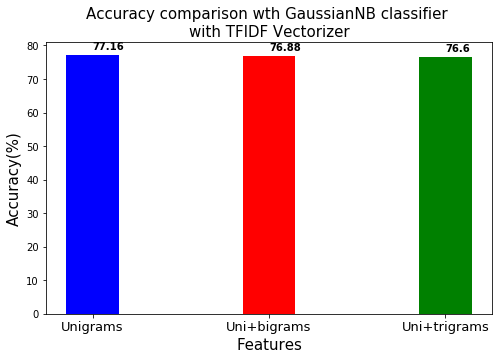

In [25]:
x = range(3)
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
test_accuracy = [77.16, 76.88, 76.60]
ax.bar(x, test_accuracy, width=0.3, color=['blue', 'red', 'green'])
tech=["Unigrams", "Uni+bigrams", "Uni+trigrams"]
ax.set_xticks(x)
ax.set_xticklabels(tech, fontsize=13)
ax.set_xlabel("Features", fontsize=15)
ax.set_ylabel("Accuracy(%)",  fontsize=15)
ax.set_title("Accuracy comparison wth GaussianNB classifier \nwith TFIDF Vectorizer", fontsize=15)
for i, v in enumerate(test_accuracy):
    ax.text(i, v+2.5, str(v), color='k', va='center', fontweight='bold')
    
#plt.savefig("Acc_comp_gaussian_tfidf.png", dpi=1000, bbox_inches='tight')
plt.show()

## Using SelectPercentile with Gaussian NB

In [4]:
def classifier_1(tweets_train, train_classes, phi_0, phi_4, perc):
    start=time.time()
    sel_perc = SelectPercentile(chi2, percentile=perc)
    tfidf_train_new = sel_perc.fit_transform(tfidf_train, train_classes)
    model_gauss = GaussianNB([phi_0, phi_4])    
    model_gauss.fit(tfidf_train_new.toarray(), list(train_classes))
    print("\nThe time taken to train the classifier is = {:2.3f}sec".format(time.time()-start))
    return model_gauss, sel_perc;

In [5]:
test_acc_perc = []
n_features_perc = []
perc = [0.15, 0.1, 0.05, 0.01, 0.001]

In [26]:
print("\n-------------Training Gaussian NB with SelectPercentile-------------------\n")

tfidf_vec = TfidfVectorizer(analyzer="word", stop_words='english',sublinear_tf=True)
tfidf_train = tfidf_vec.fit_transform(tweets_train_pd)
for i in range(len(perc)):
    start = time.time()
    print("Training Gaussian NB for Percentile = {}".format(perc[i]))
    
    nb, sel_perc = classifier_1(tfidf_train, train_classes, phi_0, phi_4, perc[i])
    end = time.time()
    tfidf_test = tfidf_vec.transform(tweets_test_pd)
    tfidf_test_new = sel_perc.transform(tfidf_test)
    test_acc_perc.append(nb.score(tfidf_test_new.toarray(), test_classes))
    n_features_perc.append(nb.theta_.shape[1])
    print("The number of features in the trained model is = {}".format(nb.theta_.shape[1]))
    print("The Test Accuracy obtained for this model = {:2.3f}%\n\n".format(test_acc_perc[i]*100))



-------------Training Gaussian NB with SelectPercentile-------------------

Training Gaussian NB for Percentile = 0.15

The time taken to train the classifier is = 18.484sec
The number of features in the trained model is = 1026
The Test Accuracy obtained for this model = 7576.600%


Training Gaussian NB for Percentile = 0.1

The time taken to train the classifier is = 13.232sec
The number of features in the trained model is = 684
The Test Accuracy obtained for this model = 7353.800%


Training Gaussian NB for Percentile = 0.05

The time taken to train the classifier is = 7.744sec
The number of features in the trained model is = 342
The Test Accuracy obtained for this model = 7103.100%


Training Gaussian NB for Percentile = 0.01

The time taken to train the classifier is = 3.094sec
The number of features in the trained model is = 69
The Test Accuracy obtained for this model = 6351.000%


Training Gaussian NB for Percentile = 0.001

The time taken to train the classifier is = 1.977sec


In [7]:
test_acc_perc = [round((x*100),3) for x in test_acc_perc]

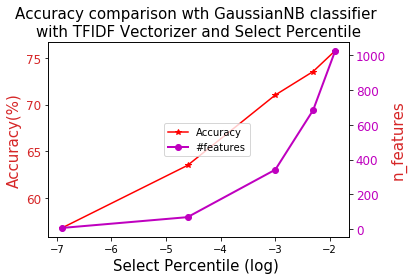

In [22]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel("Select Percentile (log) ", fontsize=15)
ax1.set_ylabel("Accuracy(%)",  fontsize=15, color=color)

ax1.tick_params(axis='y', labelcolor=color, labelsize=12)
ax1.plot(np.log(perc), test_acc_perc, marker='*', c='r', label='Accuracy')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:magenta'

ax2.set_ylabel('n_features', color=color, fontsize=15)  # we already handled the x-label with ax1
ax2.plot(np.log(perc), n_features_perc, color='m', marker='o', linewidth='2', label='#features')
ax2.tick_params(axis='y', labelcolor='m', labelsize=12)

plt.title("Accuracy comparison wth GaussianNB classifier \nwith TFIDF Vectorizer and Select Percentile", fontsize=15)
fig.legend(loc=10)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.savefig("selectPerc_comp_gaussnb_tfidf.png", dpi=1000, bbox_inches='tight')
plt.show()